World Data

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [51]:
df = pd.read_csv('world-data-2023.csv')
df.head()

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


In [52]:
df.columns

Index(['Country', 'Density\n(P/Km2)', 'Abbreviation', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Calling Code',
       'Capital/Major City', 'Co2-Emissions', 'CPI', 'CPI Change (%)',
       'Currency-Code', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Largest city', 'Life expectancy', 'Maternal mortality ratio',
       'Minimum wage', 'Official language', 'Out of pocket health expenditure',
       'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Total tax rate', 'Unemployment rate', 'Urban_population', 'Latitude',
       'Longitude'],
      dtype='object')

In [53]:
df.isna().sum()

Country                                       0
Density\n(P/Km2)                              0
Abbreviation                                  7
Agricultural Land( %)                         7
Land Area(Km2)                                1
Armed Forces size                            24
Birth Rate                                    6
Calling Code                                  1
Capital/Major City                            3
Co2-Emissions                                 7
CPI                                          17
CPI Change (%)                               16
Currency-Code                                15
Fertility Rate                                7
Forested Area (%)                             7
Gasoline Price                               20
GDP                                           2
Gross primary education enrollment (%)        7
Gross tertiary education enrollment (%)      12
Infant mortality                              6
Largest city                            

In [54]:
imputer = SimpleImputer()

data = df[['Armed Forces size', 'Birth Rate']]
data['Armed Forces size'] = data['Armed Forces size'].str.replace(',', '').astype(float)

imputed_data = pd.DataFrame(imputer.fit_transform(data))
imputed_data.columns = data.columns

C:\Users\USER\AppData\Local\Temp\ipykernel_4444\2949003676.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Armed Forces size'] = data['Armed Forces size'].str.replace(',', '').astype(float)


In [55]:
imputed_data['Birth Rate'] = imputed_data['Birth Rate'].apply(lambda x: x/10)
imputed_data

,Armed Forces size,Birth Rate
0,323000.000000,3.249
1,9000.000000,1.178
2,317000.000000,2.428
3,159274.853801,0.720
4,117000.000000,4.073
...,...,...
190,343000.000000,1.788
191,522000.000000,1.675
192,40000.000000,3.045
193,16000.000000,3.619


In [56]:
def round_data(data):
    decimal_part = data - int(data)
    if decimal_part >= 0.5:
        return int(data) + 1
    else:
        return int(data)

In [59]:
imputed_data['Birth Rate'] = imputed_data['Birth Rate'].apply(round_data)
imputed_data['Armed Forces size'] = imputed_data['Armed Forces size'].astype(int)
imputed_data

,Armed Forces size,Birth Rate
0,323000,3
1,9000,1
2,317000,2
3,159274,1
4,117000,4
...,...,...
190,343000,2
191,522000,2
192,40000,3
193,16000,4


In [102]:
forces_mean = imputed_data.groupby('Birth Rate')['Armed Forces size'].mean()
forces_mean = forces_mean.reset_index()
forces_mean['Armed Forces size'] = forces_mean['Armed Forces size'].astype(int)
forces_mean

,Birth Rate,Armed Forces size
0,1,186538
1,2,187503
2,3,115187
3,4,47800
4,5,10000


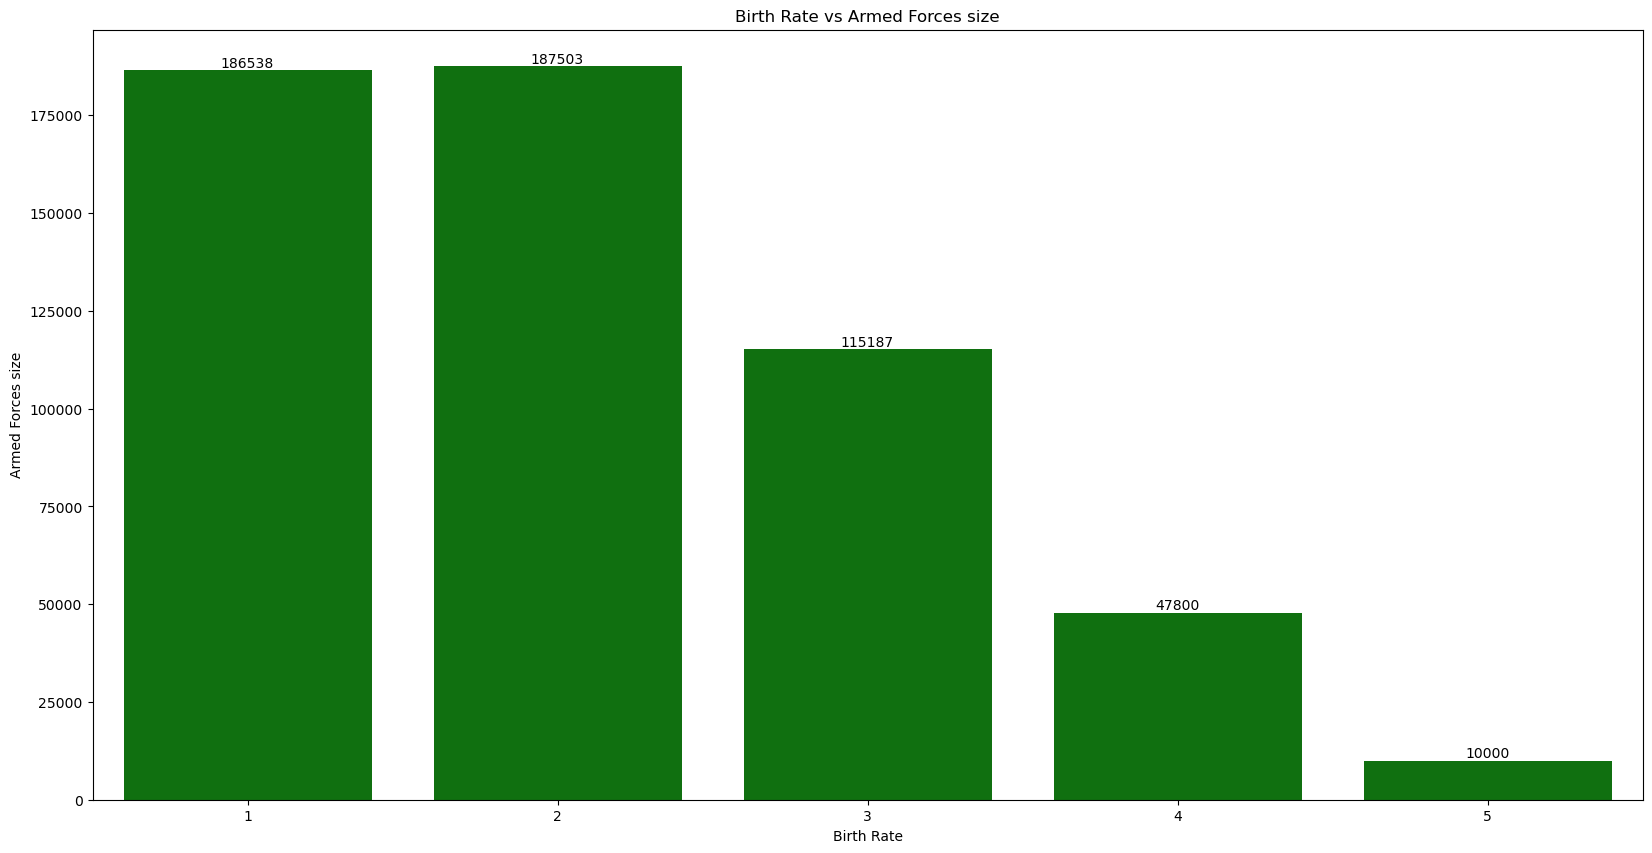

In [103]:
plt.figure(figsize=(20, 10))
sns.barplot(x=forces_mean['Birth Rate'], y=forces_mean['Armed Forces size'], color='green')

for i, value in enumerate(forces_mean['Armed Forces size']):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.xlabel('Birth Rate')
plt.ylabel('Armed Forces size')
plt.title('Birth Rate vs Armed Forces size')
plt.show()